# Data analysis project : Energy

Written by Julien Samuel, Mayuxiang Chen and Jolan Kerrien

In [1]:
import numpy as np
from scipy import stats
import pandas as pd

#Ploting librairies:
import matplotlib.pyplot as plt
import seaborn as sns

#linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error #r2_score

## 1) Graphical Representation of all the variables with respect to the target + Computing the correlation

Julien

In [2]:
# Importation of the data 
df = pd.read_csv('energy_data.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,North,0.0,type1,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,South,0.0,type1,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,Est,0.0,type1,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,West,0.0,type1,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,North,0.0,type1,20.84,28.28


Correspondance of the variable
- X1 Relative Compactness
- X2 Surface Area
- X3 Wall Area
- X4 Roof Area
- X5 Overall Height
- X6 Orientation
- X7 Glazing Area
- X8 Glazing Area Distribution

Functions that will help us through our analysis

In [100]:
def identify_missing(data): 
    ''' Identify the features missing values NaN
    Return list of features with the number of missing values 
    input = dataframe and print dataframe '''
    missing = data.isnull().sum()
    missing_result = pd.DataFrame(missing).reset_index().rename(columns = {'index' : 'features', 0 :'missing_nbr'})
    missing_result['missing_fraction']=(missing_result.missing_nbr/data.shape[0])*100
    print(missing_result)
    
def information_about_data(data): 
    '''numeric features : get the min and the max
       categorical features get the nbr of classes
       input = a dataframe and prints statistics of columns of this dataframe'''
    print(" ")
    print("Numerical features")
    for col in data.columns : 
        if data[col].dtype != 'object' :
            print('The feature "%s" have a minimum value of %s and a maximum value of %s' % (col,data[col].min(), data[col].max()))

    print(" ")
    print("Categorical features")
    for col in data.columns : 
        if data[col].dtype == 'object' :
            print('The feature "%s" have %s unique values which are %s' % (col,len(data[col].unique()),data[col].unique()))
            
def Plot(df,Y_value):
    for i in [1,2,3,4,5,7]:
        plt.plot(df[f'X{i}'],df[f'Y{Y_value}'],'.',label = f'Y{Y_value} (X{i})')
        plt.legend()
        plt.show()
    

In [101]:
identify_missing(df)

  features  missing_nbr  missing_fraction
0       X1            0               0.0
1       X2            0               0.0
2       X3            0               0.0
3       X4            0               0.0
4       X5            0               0.0
5       X6            0               0.0
6       X7            0               0.0
7       X8            0               0.0
8       Y1            0               0.0
9       Y2            0               0.0


There is no missing numbers in our data, so no need to think about a way to replace them

In [102]:
information_about_data(df)

 
Numerical features
The feature "X1" have a minimum value of 0.62 and a maximum value of 0.98
The feature "X2" have a minimum value of 514.5 and a maximum value of 808.5
The feature "X3" have a minimum value of 245.0 and a maximum value of 416.5
The feature "X4" have a minimum value of 110.25 and a maximum value of 220.5
The feature "X5" have a minimum value of 3.5 and a maximum value of 7.0
The feature "X7" have a minimum value of 0.0 and a maximum value of 0.4
The feature "Y1" have a minimum value of 6.01 and a maximum value of 43.1
The feature "Y2" have a minimum value of 10.9 and a maximum value of 48.03
 
Categorical features
The feature "X6" have 4 unique values which are ['North' 'South' 'Est' 'West']
The feature "X8" have 6 unique values which are ['type1' 'type2' 'type3' 'type4' 'type5' 'type6']


### Tracer des $X_i$ en fonction de $Y_1$ puis $Y_2$

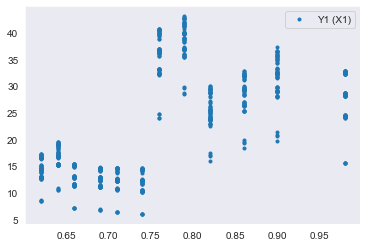

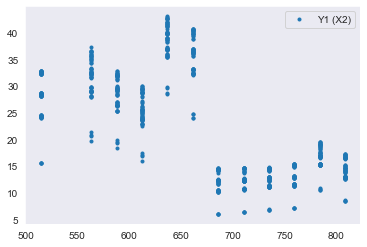

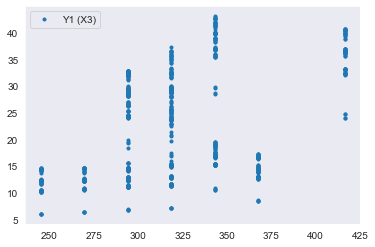

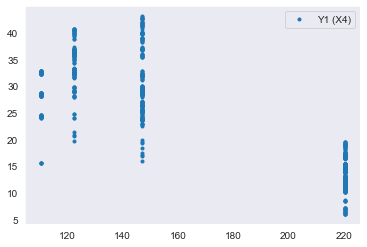

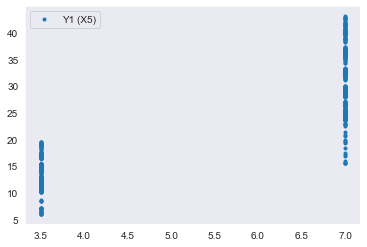

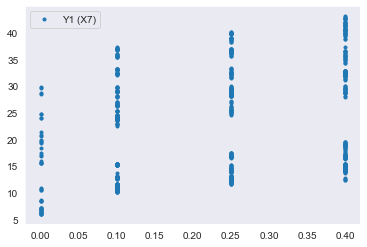

In [103]:
Plot(df,1)

We also computed the correlation between all the numerical variables in a heatmap :

<AxesSubplot:>

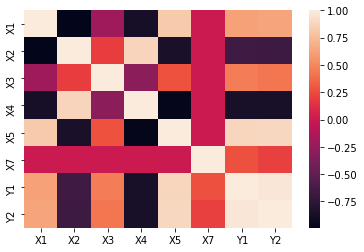

In [235]:
def heatmap(df):
    df_new = df.copy()
    data = pd.DataFrame(df_new, columns=['X1','X2','X3','X4','X5','X6','X7','X8','Y1','Y2'])
    del data['X6']
    del data['X8']
    return sns.heatmap(data.corr())

heatmap(df)

## 2) Transformation of the categorical variables

Julien

We must transform the 2 categorical variables which are $X_6$ (the orientation) and $X_8$ (the glazing area distribution) into numerical variables.

Firstly, we plot $X_6$ and $X_8$ against $Y_1$ in a histogram :

In [3]:
#plot distribution between a categorical value and a numerical value in an histogram via predefined function
def plot_figure_num(x_var,groupby_var,w,h, nbr_bins,x_min, x_max,step_x,df,colors):
    '''input : name of numerical variable , name of categorical variable ,width,height, 
               nbr_bins,x_min numeric, x_max numeric,step_x to show ,dataframe'''
    #x_var = 'hours-per-week'
    #groupby_var = 'income'
    df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
    vals = [df[x_var].values.tolist() for i, df in df_agg]
    plt.figure(figsize=(w,h))
    n, bins, patches = plt.hist(vals, nbr_bins, stacked=True, color=colors[:len(vals)], edgecolor = 'black') 
    plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
    plt.xlabel(x_var)
    plt.ylabel("count")
    plt.xticks(np.arange(x_min, x_max, step=step_x))
    plt.title(x_var + ' distribution in function of ' + groupby_var)
    plt.show()

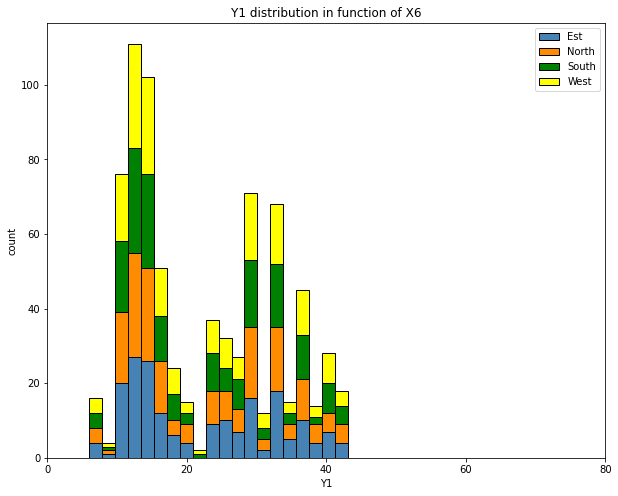

In [201]:
plot_figure_num('Y1','X6',10,8, 20,0, 100,20,df,['steelblue','darkorange','green','yellow'])

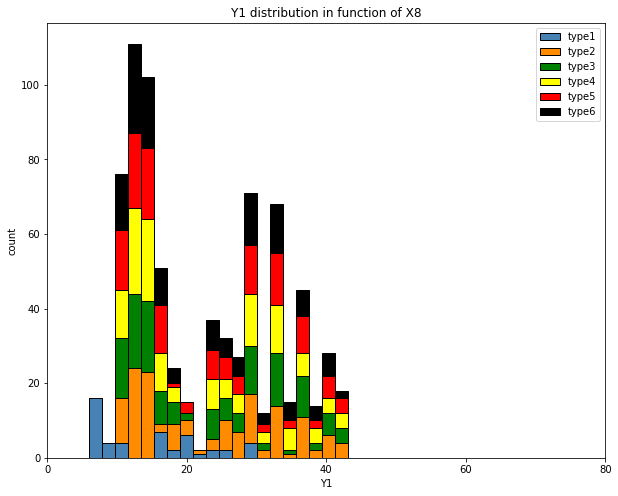

In [202]:
plot_figure_num('Y1','X8',10,8, 20,0, 100,20,df,['steelblue','darkorange','green','yellow','red','black'])

### Transformation of the variable

The orientation $X_6$ has 4 distinct value : North, South, West and East. 
Therefore it can be transformed by replacing the $X_6$ column by 3 new columns:

North : 1 or 0

South : 1 or 0

West : 1 or 0

Where 1 means yes and 0 means no, also if all 3 columns have 0 values it means the direction is East.

The glazing area distribution $X_8$ has 6 distinct values : type 1, type 2, type 3, type 4, type 5 and type 6.
So, it can be transformed into :

type 1 : 1  

type 2 : 2  

type 3 : 3

type 4 : 4

type 5 : 5

type 6 : 6

In [203]:
def transfX6(df):
    df_new = df.copy()
    df_new.insert(6,'North', (df['X6']== 'North').astype(int))
    df_new.insert(7,'South', (df['X6']== 'South').astype(int))
    df_new.insert(8,'West', (df['X6']== 'West').astype(int))
    del df_new['X6']
    return df_new

def transfX8(df):
    df_new = df.copy()
    list = {"X8" : {"type1":1, "type2":2, "type3":3, "type4":4, "type5":5, "type6":6}}
    df_new = df_new.replace(list)
    return df_new

In [204]:
X6_num = transfX6(df)
X8_num = transfX8(df)

df1 = pd.DataFrame(X6_num)
df2 = pd.DataFrame(X8_num)
df1['X8']=df2['X8']

df_num = df1.copy()
df_num.head()

,X1,X2,X3,X4,X5,North,South,West,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,1,0,0,0.0,1,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,0,1,0,0.0,1,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,0,0,0,0.0,1,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,0,0,1,0.0,1,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,1,0,0,0.0,1,20.84,28.28


In [205]:
## Stats with the numerical values
stat = pd.DataFrame()
stat['mean'] = df_num.mean()
stat['Var'] = df_num.var()
stat['Std.Var'] = df_num.std()
stat

,mean,Var,Std.Var
X1,0.764167,0.011189,0.105777
X2,671.708333,7759.163842,88.086116
X3,318.500000,1903.269883,43.626481
X4,176.604167,2039.963060,45.165950
X5,5.250000,3.066493,1.751140
North,0.250000,0.187744,0.433295
South,0.250000,0.187744,0.433295
West,0.250000,0.187744,0.433295
X7,0.234375,0.017748,0.133221
X8,3.812500,2.405476,1.550960


<AxesSubplot:>

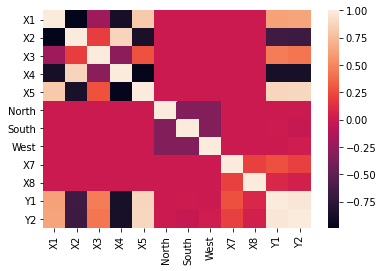

In [207]:
def heatmap2(df_num):
    df_new = df_num.copy()
    data = pd.DataFrame(df_new, columns=['X1','X2','X3','X4','X5','North','South','West','X7','X8','Y1','Y2'])
    return sns.heatmap(data.corr())

heatmap2(df_num)

## 3) Normalize variables

In [208]:
df_norm = (df_num - df_num.min())/(df_num.max()-df_num.min())
#df_norm = (df_num-df_num.mean())/df_num.std()

df_norm.head()

,X1,X2,X3,X4,X5,North,South,West,X7,X8,Y1,Y2
0,1.000000,0.000000,0.285714,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,1.0,0.0,0.0,0.0,0.0,0.399838,0.468085


## 4) Shuffle dataset + split train/test subsets

Mayuxiang

In [209]:
# divided the variables
df_shuffled = df_norm.sample(frac=1).reset_index(drop=True)
X_shuff = df_shuffled[['X1', 'X2', 'X3', 'X4','X5','North','South','West','X7','X8']]  #quantitatives explanatory variables
Y_shuff = df_shuffled['Y1']

X_train, X_test, Y_train, Y_test = train_test_split(X_shuff, Y_shuff, test_size=0.2)  

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(614, 10) (154, 10) (614,) (154,)


## 5) Apply multiple linear regression with code seen in the class (vary alpha and nbr of iterations + comment)


Jolan

In this part, we will do a multilinear regression of Y1 depending on the other explicative variables X1,X2,X3,X4,X5,X6,X7,X8.  
$Y_{1_{pred}} = H \times W$  with H the featured matrix  
The regression matrix W will be determined using a gradient descent.  
The error (RSS) for different value of iterations and steps will be ploted and commented.  
  
In order to verify our model we will use the split train/tests subsets. The training data ($X_{train},Y_{train}$)will be used for building the model (the regression matrix) while the test data  
($X_{test},Y_{test}$) will serve as a reference.

In [210]:
#Setting the matrixes

ones, ones2 = np.ones([X_train.shape[0],1]), np.ones([X_test.shape[0],1])
ones3, ones4 =  np.ones([Y_train.shape[0],1]), np.ones([Y_test.shape[0],1])

Y_train2 ,Y_test2 = np.expand_dims(Y_train, axis = 1), np.expand_dims(Y_test,axis = 1)
X_train2 , X_test2 = np.concatenate((ones,X_train),axis=1), np.concatenate((ones2,X_test),axis=1)
print(X_train2.shape, X_test2.shape, Y_train2.shape, Y_test2.shape)

W = np.zeros([1,11])

(614, 11) (154, 11) (614, 1) (154, 1)


In [211]:
#Functions
def computeHeatingLoad(X,Y,W):
    #return the RSS at a given matrix W
    tobesummed = np.power(((X @ W.T)-Y),2)
    return np.sum(tobesummed)/(len(X))

def gradientDescent(X,Y,W,iters,alpha):
    #return the final matrix W and the value of RSS for each iterations
    Err = np.zeros(iters)
    for i in range(iters):
        W = W - (2*alpha/len(X)) * np.sum(X * (X @ W.T - Y), axis=0)
        Err[i] = computeHeatingLoad(X, Y, W)
    return W,Err

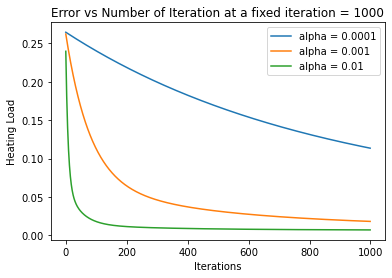

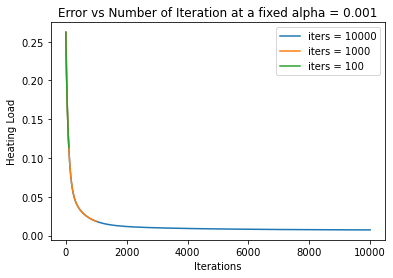

In [216]:
#Hyper-parameters tested
Alpha = [0.0001,0.001,0.01]
Iters = [10000,1000,100]
#Init
ItersF, gitf  = [1 for x in range(len(Alpha)**2)], [1 for x in range(len(Alpha)**2)]

#Create a list in which all the errors and regression matrice at a given iteration and a given alpha are filled
for i,iters in enumerate(Iters):
    for j,alpha in enumerate(Alpha):
        gitf[i*len(Iters)+j] , ItersF[i*len(Iters)+j] = gradientDescent(X_train2,Y_train2,W,iters,alpha)
        
#Plot
for i in range(3):
    plt.plot(np.arange(Iters[1]),ItersF[i+3], label = f'alpha = {Alpha[i]}')
    plt.title('Error vs Number of Iteration at a fixed iteration = 1000')
    plt.xlabel("Iterations")
    plt.ylabel("Heating Load")
    plt.legend()
plt.show()
for i in range(3):
    plt.plot(np.arange(Iters[i]),ItersF[i*3+1],  label = f'iters = {Iters[i]}')
    plt.title('Error vs Number of Iteration at a fixed alpha = 0.001')
    plt.xlabel("Iterations")
    plt.ylabel("Heating Load")
    plt.legend()

Text(0.5, 1.0, 'Final Heating Load Error heatingmap for different alpha and iterations')

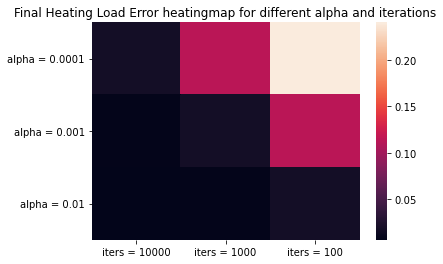

In [217]:
#Final RSS Heating Load values with alpha or iters fixed
HeatingLoad = [computeHeatingLoad(X_train2,Y_train2,g) for g in gitf]
Results = pd.DataFrame(index = [f'alpha = {Alpha[0]}', f'alpha = {Alpha[1]}', f'alpha = {Alpha[2]}'])
#Results['Value of alpha'] = Alpha
for i,iters in enumerate(Iters):
    Results[f'iters = {iters}'] = HeatingLoad[i*3:i*3+3]
sns.heatmap(Results)
plt.title('Final Heating Load Error heatingmap for different alpha and iterations')

The results shows that with our model an important alpha and a large number of iteration fits the best in order to obtain the smallest error.  
However, one can see that at a certain number of iteration or a certain value of alpha chaging the other parameter will not have much consequences.  
Moreover, it is not show here but for values higher than $alpha = 0.32$ the model diverges and cannot reached the minimum point.

### Quantification and visualisation of this linear regression

In this part, we will use the following parameters: $\alpha = 0.01$ and $number \ of \ iteration = 10000$.

  Variable  Coefficient
0       X1    -0.120817
1       X2     0.025015
2       X3     0.157227
3       X4    -0.072933
4       X5     0.477914
5    North    -0.008350
6    South     0.000485
7     West    -0.002123
8       X7     0.218101
9       X8     0.024728
Mean Squared Error (MSE): 0.007090909445473985
Root Mean Squared Error (RMSE): 0.08420753793737223


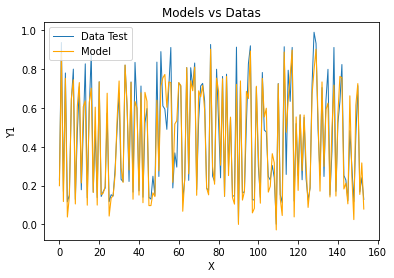

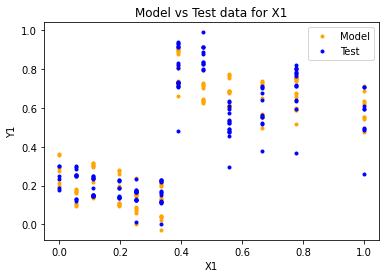

In [218]:
#Weight of the variable in the matrix W
coef_df = pd.DataFrame()
W_new = [W for W in gitf[2]][0]
coef_df['Variable'] = ['X1', 'X2', 'X3', 'X4','X5','North','South','West','X7','X8']
coef_df['Coefficient'] = W_new[1:]
print(coef_df)

#Calcul of the error over the prediction
# Mean Squared Error (MSE)
MSE=mean_squared_error(Y_test, Y_pred)
print('Mean Squared Error (MSE):',MSE)
# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error (RMSE):',MSE**(1/2))

#Visualization
X_ax=range(len(Y_test))
plt.plot(X_ax,Y_test,linewidth=1,label="Data Test")
plt.plot(X_ax,Y_pred,linewidth=1.1,label="Model",color="orange")
plt.title("Models vs Datas")
plt.legend()
plt.ylabel('Y1')
plt.xlabel('X')
plt.show()

Y_pred = X_test2 @ W_new.T
plt.plot(X_test['X1'].to_numpy(),Y_pred,'.',linewidth=1.1,label="Model",color="orange")
plt.plot(X_test['X1'].to_numpy(),Y_test2,'.',linewidth=1.1,label="Test",color="blue")
plt.title("Model vs Test data for X1")
plt.xlabel('X1')
plt.ylabel('Y1')
plt.legend()

The results show that this method can make a relatively good modelisation of Y1 with the explanatory variables.   
Indeed we have a low RMSE with a value of $0.078$.  
However, the different data points where relatively close to each other which can falsify the verification with the test variables.  


## 6) Apply the linear regression of Scikit learn library (cf. the code given in class) + vary attributes and compare to question 5

We will still try to do a multilinear regression but using this time the scikit learn library (close to deep learning).  

Coefficient of determination (R2): 0.9172377684533709
        Coefficient
X1    -6.458834e-01
X2     3.323150e+12
X3    -1.938504e+12
X4    -2.492363e+12
X5     3.984375e-01
North -6.994247e-03
South  1.922607e-03
West   1.060486e-03
X7     2.140923e-01
X8     2.826309e-02
Mean Squared Error (MSE): 0.006906378384397754
Root Mean Squared Error (RMSE): 0.08310462312289103


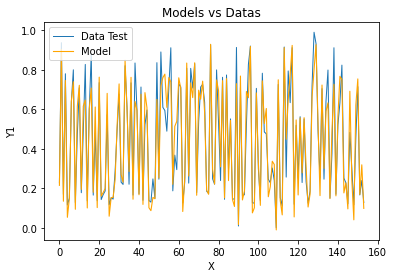

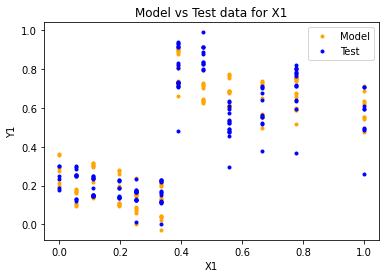

In [219]:
#Definition of the linear regression model
reg = LinearRegression().fit(X_train,Y_train) # adjusted with the train values
 
print('Coefficient of determination (R2):', reg.score(X_train, Y_train)) #Precision score of the model

#Wheight of the regression
coeff_df = pd.DataFrame(reg.coef_, X_shuff.columns, columns=['Coefficient'])
print(coeff_df) 

# Prediction using the tests
Y_pred = reg.predict(X_test)

#Calcul of the error over the prediction
# Mean Squared Error (MSE)
MSE=mean_squared_error(Y_test, Y_pred)
print('Mean Squared Error (MSE):',MSE)
# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error (RMSE):',MSE**(1/2))



#Visualization 
X_ax=range(len(Y_test))
plt.plot(X_ax,Y_test,linewidth=1,label="Data Test")
plt.plot(X_ax,Y_pred,linewidth=1.1,label="Model",color="orange")
plt.title("Models vs Datas")
plt.legend()
plt.ylabel('Y1')
plt.xlabel('X')
plt.show()

Y_pred = X_test2 @ W_new.T
plt.plot(X_test['X1'].to_numpy(),Y_pred,'.',linewidth=1.1,label="Model",color="orange")
plt.plot(X_test['X1'].to_numpy(),Y_test2,'.',linewidth=1.1,label="Test",color="blue")
plt.title("Model vs Test data for X1")
plt.xlabel('X1')
plt.ylabel('Y1')
plt.legend()

### Comparaison

The weights of the different variables is completely different but the results and the exactitude remains the same regarding the value of the RMSE ( 0.078 and 0.083).

## 7) Use python libraries to get p-value of the different coefficients of the variables + Interprete

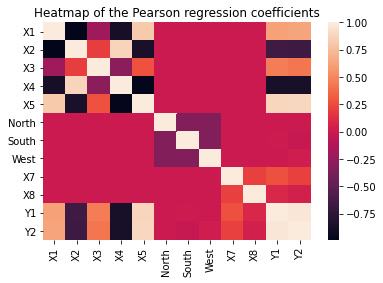

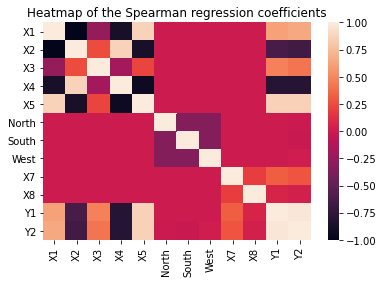

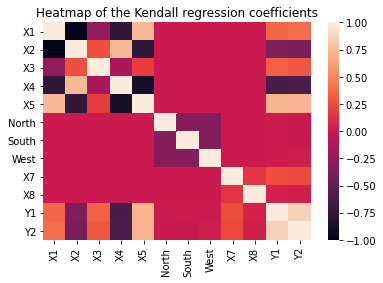

In [239]:
#get all the regression coefficient
corr1 = df_norm.corr(method = 'pearson')
corr2 = df_norm.corr(method = 'spearman')
corr3 = df_norm.corr(method = 'kendall')
sns.heatmap(corr1)
plt.title('Heatmap of the Pearson regression coefficients')
plt.show()
sns.heatmap(corr2)
plt.title('Heatmap of the Spearman regression coefficients')
plt.show()
sns.heatmap(corr3)
plt.title('Heatmap of the Kendall regression coefficients')
plt.show()

Comments...